In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import bbknn

In [2]:

maize_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu16_19_29_32_SeuratV4.0.1_finalclustermaize.h5ad')
maize_single_cell

AnnData object with n_obs × n_vars = 10551 × 28492
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features'
    obsm: 'X_umap'

In [3]:
arabi_single_cell = sc.read_h5ad('/data/passala/Collaborator_Data/Maize_arabi_Jack_Collab/xu_41_42.int_filter_recluster_final_forBen_arabi.h5ad')
arabi_single_cell

AnnData object with n_obs × n_vars = 20224 × 23339
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features'
    obsm: 'X_umap'

In [4]:
co_expressalog_map_85 = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/true_pair_dataframe_at_85_tolerance.csv')
ensmbl_to_grm = pd.read_csv('/home/passala/Gene_duplication_project/Code/Jack_Dave_maize_project/Minor_tables/ensmbl_to_grm_table.csv')
co_expressalog_map_85

,Arabidopsis Gene,Maize Gene
0,AT3G50620,Zm00001d029417
1,AT5G44040,Zm00001d027589
2,AT5G42760,Zm00001d034249
3,AT3G53470,Zm00001d031954
4,AT1G32400,Zm00001d049526
...,...,...
5732,AT4G27030,Zm00001d000020
5733,AT2G35170,Zm00001d000053
5734,AT4G16970,Zm00001d000034
5735,AT2G15980,Zm00001d000435


In [5]:
co_expressalog_map_85 = co_expressalog_map_85.merge(right = ensmbl_to_grm, how = 'left', left_on= 'Maize Gene', right_on= 'EnsemblID')
co_expressalog_map_85 = co_expressalog_map_85.dropna()
co_expressalog_map_85 = co_expressalog_map_85[['Arabidopsis Gene','GRM Name']]


In [6]:
co_expressalog_map_85

,Arabidopsis Gene,GRM Name
0,AT3G50620,GRMZM2G003530
1,AT5G44040,GRMZM2G172758
2,AT5G42760,GRMZM2G068179
3,AT3G53470,GRMZM2G144982
5,AT2G16700,GRMZM2G077942
...,...,...
5727,AT3G08800,GRMZM2G136268
5729,AT4G18370,GRMZM2G118646
5730,AT1G77840,EIF5
5731,AT1G71696,GRMZM2G106683


In [7]:
arabi_single_cell.var.index

Index(['AT1G01010', 'AT1G01020', 'AT1G01030', 'AT1G01040', 'AT1G01050',
       'AT1G03997', 'AT1G01060', 'AT1G01070', 'AT1G01080', 'AT1G01090',
       ...
       'AT5G09475', 'AT5G65800', 'AT5G66390', 'AT5G09665', 'AT5G09775',
       'AT5G67060', 'ATCG00830', 'ATCG00920', 'ATCG01000', 'ATMG00560'],
      dtype='object', length=23339)

In [8]:
arabi_single_cell.var = arabi_single_cell.var.merge(right = co_expressalog_map_85, right_on = 'Arabidopsis Gene', how = 'left', left_on = 'features')

arabi_single_cell.var.index = arabi_single_cell.var['features'].to_list()
arabi_single_cell.var

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


,features,Arabidopsis Gene,GRM Name
AT1G01010,AT1G01010,NaN,NaN
AT1G01020,AT1G01020,NaN,NaN
AT1G01030,AT1G01030,NaN,NaN
AT1G01040,AT1G01040,NaN,NaN
AT1G01050,AT1G01050,AT1G01050,GRMZM2G061928
...,...,...,...
AT5G67060,AT5G67060,NaN,NaN
ATCG00830,ATCG00830,NaN,NaN
ATCG00920,ATCG00920,NaN,NaN
ATCG01000,ATCG01000,NaN,NaN


In [9]:
maize_single_cell.var

,features
GRMZM2G059865,GRMZM2G059865
GRMZM2G093344,GRMZM2G093344
GRMZM2G306216,GRMZM2G306216
GRMZM2G104572,GRMZM2G104572
GRMZM5G822187,GRMZM5G822187
...,...
GRMZM2G128549,GRMZM2G128549
GRMZM2G450231,GRMZM2G450231
GRMZM2G074773,GRMZM2G074773
GRMZM5G826672,GRMZM5G826672


In [10]:
co_expressalog_map_85

,Arabidopsis Gene,GRM Name
0,AT3G50620,GRMZM2G003530
1,AT5G44040,GRMZM2G172758
2,AT5G42760,GRMZM2G068179
3,AT3G53470,GRMZM2G144982
5,AT2G16700,GRMZM2G077942
...,...,...
5727,AT3G08800,GRMZM2G136268
5729,AT4G18370,GRMZM2G118646
5730,AT1G77840,EIF5
5731,AT1G71696,GRMZM2G106683


In [11]:
maize_single_cell.var

,features
GRMZM2G059865,GRMZM2G059865
GRMZM2G093344,GRMZM2G093344
GRMZM2G306216,GRMZM2G306216
GRMZM2G104572,GRMZM2G104572
GRMZM5G822187,GRMZM5G822187
...,...
GRMZM2G128549,GRMZM2G128549
GRMZM2G450231,GRMZM2G450231
GRMZM2G074773,GRMZM2G074773
GRMZM5G826672,GRMZM5G826672


In [12]:
maize_single_cell.var.merge(right = co_expressalog_map_85, right_on = 'GRM Name', how = 'left', left_on = 'features')


,features,Arabidopsis Gene,GRM Name
0,GRMZM2G059865,NaN,NaN
1,GRMZM2G093344,NaN,NaN
2,GRMZM2G306216,NaN,NaN
3,GRMZM2G104572,NaN,NaN
4,GRMZM5G822187,NaN,NaN
...,...,...,...
28487,GRMZM2G128549,NaN,NaN
28488,GRMZM2G450231,NaN,NaN
28489,GRMZM2G074773,NaN,NaN
28490,GRMZM5G826672,NaN,NaN


In [13]:
maize_single_cell.var = maize_single_cell.var.merge(right = co_expressalog_map_85, right_on = 'GRM Name', how = 'left', left_on = 'features')

maize_single_cell.var.index = maize_single_cell.var['features'].to_list()
maize_single_cell.var

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:794: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    [0, 1, 2, 3, 4]

    Inferred to be: integer

  value_idx = self._prep_dim_index(value.index, attr)


,features,Arabidopsis Gene,GRM Name
GRMZM2G059865,GRMZM2G059865,NaN,NaN
GRMZM2G093344,GRMZM2G093344,NaN,NaN
GRMZM2G306216,GRMZM2G306216,NaN,NaN
GRMZM2G104572,GRMZM2G104572,NaN,NaN
GRMZM5G822187,GRMZM5G822187,NaN,NaN
...,...,...,...
GRMZM2G128549,GRMZM2G128549,NaN,NaN
GRMZM2G450231,GRMZM2G450231,NaN,NaN
GRMZM2G074773,GRMZM2G074773,NaN,NaN
GRMZM5G826672,GRMZM5G826672,NaN,NaN


In [14]:
arabi_var_names_with_ortholog = arabi_single_cell.var.dropna().index
arabi_version_of_maize_genes_with_ortholog = maize_single_cell.var.dropna()['Arabidopsis Gene'].to_list()

In [15]:
overlap_of_shared_genes = arabi_var_names_with_ortholog.intersection(arabi_version_of_maize_genes_with_ortholog)
overlap_of_shared_genes

Index(['AT1G01090', 'AT1G01140', 'AT1G01210', 'AT1G01225', 'AT1G01350',
       'AT1G01360', 'AT1G01370', 'AT1G01470', 'AT1G01490', 'AT1G01510',
       ...
       'AT5G67330', 'AT5G67380', 'AT5G67420', 'AT5G67500', 'AT5G67530',
       'AT5G67560', 'AT5G67590', 'AT2G20825', 'AT2G30424', 'AT3G18900'],
      dtype='object', length=4538)

In [16]:
maize_genes_to_keep = maize_single_cell.var.loc[maize_single_cell.var['Arabidopsis Gene'].isin(overlap_of_shared_genes)].index

In [17]:
maize_single_cell_trimmed_to_orthologs = maize_single_cell[:,maize_genes_to_keep]
maize_single_cell_trimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 10551 × 4538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'DataSet', 'integrated_snn_res.1', 'seurat_clusters', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1'
    var: 'features', 'Arabidopsis Gene', 'GRM Name'
    obsm: 'X_umap'

In [18]:
arabi_single_cell_slimmed_to_orthologs = arabi_single_cell[:,overlap_of_shared_genes]
arabi_single_cell_slimmed_to_orthologs

View of AnnData object with n_obs × n_vars = 20224 × 4538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54'
    var: 'features', 'Arabidopsis Gene', 'GRM Name'
    obsm: 'X_umap'

In [19]:
maize_single_cell_trimmed_to_orthologs.var.index = maize_single_cell_trimmed_to_orthologs.var['Arabidopsis Gene'].to_list()
maize_single_cell_trimmed_to_orthologs.var

,features,Arabidopsis Gene,GRM Name
AT3G60340,GRMZM2G374779,AT3G60340,GRMZM2G374779
AT5G61510,GRMZM2G002121,AT5G61510,GRMZM2G002121
AT4G30600,GRMZM2G060296,AT4G30600,GRMZM2G060296
AT4G11450,GRMZM2G703466,AT4G11450,GRMZM2G703466
AT2G45950,GRMZM2G109725,AT2G45950,GRMZM2G109725
...,...,...,...
AT1G65032,GRMZM2G431885,AT1G65032,GRMZM2G431885
AT3G50400,GRMZM2G070178,AT3G50400,GRMZM2G070178
AT5G49810,GRMZM2G098031,AT5G49810,GRMZM2G098031
AT2G18660,GRMZM2G099092,AT2G18660,GRMZM2G099092


In [20]:
# maize_single_cell_trimmed_to_orthologs.obs['Species'] = 'Maize'
# arabi_single_cell_slimmed_to_orthologs.obs['Species'] = 'Arabidopsis'


In [21]:
concatendated_arabi_maize_dataset = arabi_single_cell_slimmed_to_orthologs.concatenate(maize_single_cell_trimmed_to_orthologs, batch_key = 'Species', batch_categories = ['Arabidopsis','Maize'])

In [22]:
sc.tl.pca(concatendated_arabi_maize_dataset)

In [23]:
bbknn.bbknn(concatendated_arabi_maize_dataset,batch_key='Species')


In [24]:
concatendated_arabi_maize_dataset

AnnData object with n_obs × n_vars = 30775 × 4538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54', 'DataSet', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1', 'Species'
    var: 'Arabidopsis Gene', 'GRM Name', 'features-Arabidopsis', 'features-Maize'
    uns: 'pca', 'neighbors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [30]:
concatendated_arabi_maize_dataset.X.todense()

matrix([[0.6354455 , 1.0209123 , 0.6354455 , ..., 0.        , 0.        ,
         0.        ],
        [1.6563183 , 1.9960564 , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.53111047, 0.53111047, 0.        , ..., 0.53111047, 0.        ,
         1.1321954 ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.6056816 ],
        [0.50769866, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]], dtype=float32)

In [25]:
sc.tl.umap(concatendated_arabi_maize_dataset)

In [31]:
concatendated_arabi_maize_dataset

AnnData object with n_obs × n_vars = 30775 × 4538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.5', 'seurat_clusters', 'source', 'integrated_snn_res.0.5', 'integrated_snn_res.0.75', 'integrated_snn_res.1', 'integrated_snn_res.1.2', 'integrated_snn_res.1.5', 'integrated_snn_res.2', 'integrated_snn_res.0.45', 'integrated_snn_res.0.25', 'integrated_snn_res.0.7', 'integrated_snn_res.0.8', 'integrated_snn_res.0.65', 'integrated_snn_res.0.6', 'integrated_snn_res.0.55', 'integrated_snn_res.0.53', 'integrated_snn_res.0.52', 'integrated_snn_res.0.54', 'DataSet', 'test_res.1', 'determinate', 'subcluster9', 'mygraph_res.1', 'Species'
    var: 'Arabidopsis Gene', 'GRM Name', 'features-Arabidopsis', 'features-Maize'
    uns: 'pca', 'neighbors', 'umap', 'Species_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [26]:
sc.set_figure_params(facecolor = 'white', figsize = (20,15))

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'RNA_snn_res.0.5' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` para

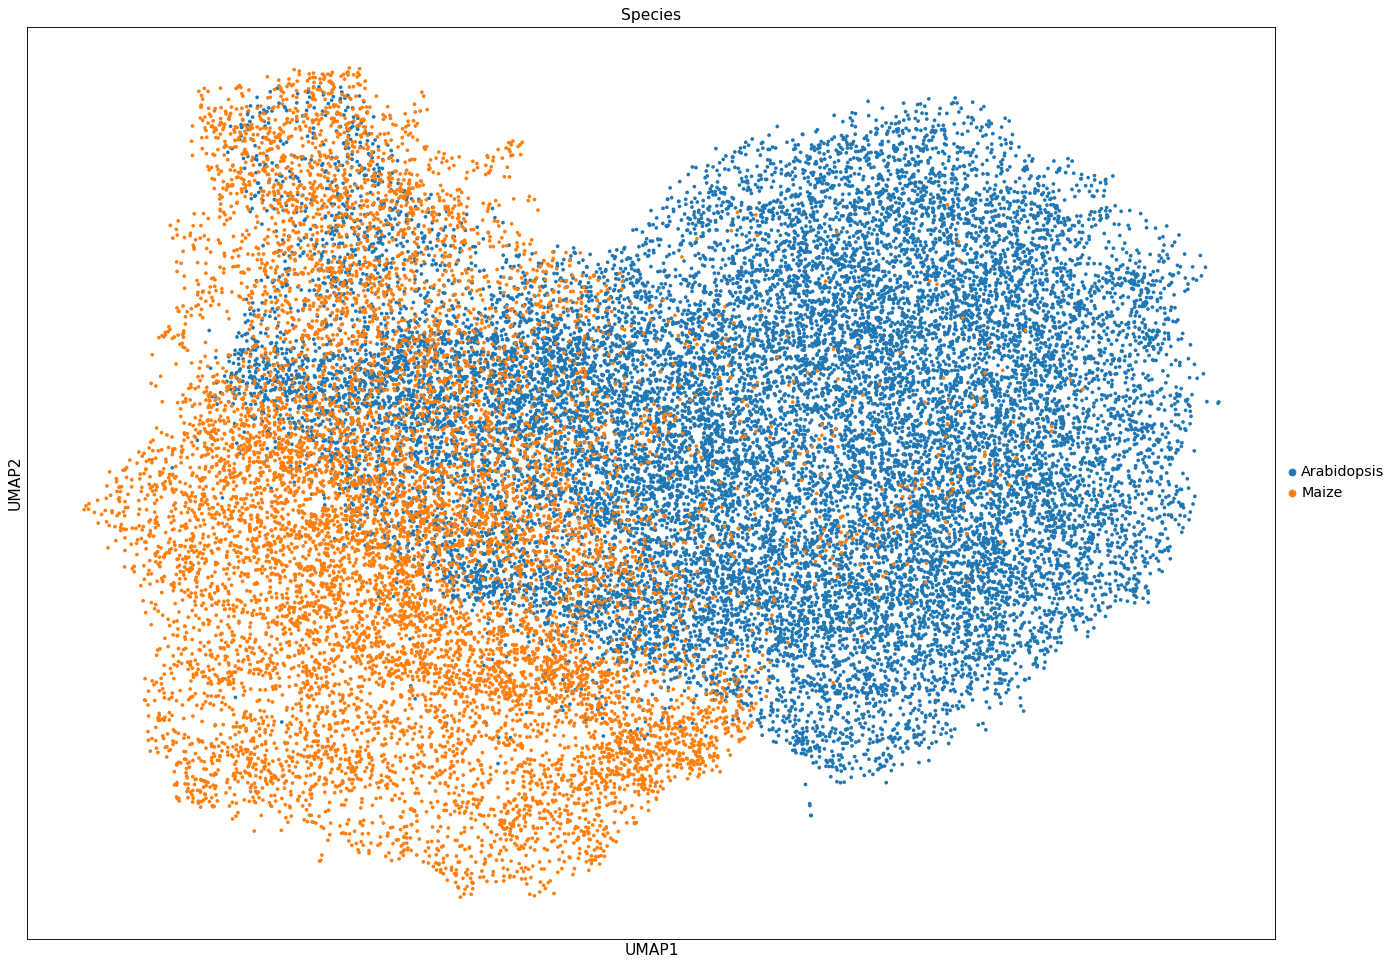

In [27]:
sc.pl.umap(concatendated_arabi_maize_dataset, color ='Species', s = 45)